In [1]:
%matplotlib inline
from env import user, password, host
from math import sqrt 
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import spearmanr, pearsonr
from sklearn import neighbors, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings


plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings("ignore")

In [2]:
df22 = pd.read_csv('DISTRICT_summary_22.csv')

In [3]:
df21 = pd.read_csv('DISTRICT_summary_21.csv')

In [4]:
df20 = pd.read_csv('DISTRICT_summary_20.csv')

In [5]:
df19 = pd.read_csv('DISTRICT_summary_19.csv')

In [6]:
df22.head()

,AGGREGATION LEVEL,REGION,DISTNAME,DISTRICT,CHARTER_STATUS,SECTION,HEADING,HEADING NAME,YR22
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1177
1,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A02,DISTRICT DISCIPLINE POPULATION,156
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,248
3,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B10,COUNT OF STUDENTS SUSPENDED IN SCHOOL,45
4,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B13,STUDENTS SUSPENDED OUT OF SCHOOL,132


In [7]:
df21.head()

,AGGREGATION LEVEL,REGION,DISTNAME,DISTRICT,CHARTER_STATUS,SECTION,HEADING,HEADING NAME,YR21
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1537
1,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A02,DISTRICT DISCIPLINE POPULATION,-999
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,-999
3,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B13,STUDENTS SUSPENDED OUT OF SCHOOL,-999
4,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,F-OUT OF SCHOOL SUSPENSIONS,C24,BLACK OR AFRICAN AMERICAN,-999


In [8]:
df20.head()

,AGGREGATION LEVEL,REGION,DISTNAME,DISTRICT,CHARTER_STATUS,SECTION,HEADING,HEADING NAME,YR20
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1845
1,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A02,DISTRICT DISCIPLINE POPULATION,119
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,207
3,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B10,COUNT OF STUDENTS SUSPENDED IN SCHOOL,62
4,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B13,STUDENTS SUSPENDED OUT OF SCHOOL,85


In [9]:
df19.head()

,AGGREGATION LEVEL,REGION,DISTNAME,DISTRICT,CHARTER_STATUS,SECTION,HEADING,HEADING NAME,YR19
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469
2,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A02,DISTRICT DISCIPLINE POPULATION,109
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151
4,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B10,COUNT OF STUDENTS SUSPENDED IN SCHOOL,74


In [10]:
df19 = df19.rename(columns={'AGGREGATION LEVEL':'agg_level', 'REGION':'region', 'DISTNAME':'dist_name', 'DISTRICT':'district_num', 'CHARTER_STATUS':'charter_status', 'SECTION':'section', 'HEADING':'heading', 'HEADING NAME':'heading_name'})

In [11]:
df20 = df20.rename(columns={'AGGREGATION LEVEL':'agg_level', 'REGION':'region', 'DISTNAME':'dist_name', 'DISTRICT':'district_num', 'CHARTER_STATUS':'charter_status', 'SECTION':'section', 'HEADING':'heading', 'HEADING NAME':'heading_name'})

In [12]:
df21 = df21.rename(columns={'AGGREGATION LEVEL':'agg_level', 'REGION':'region', 'DISTNAME':'dist_name', 'DISTRICT':'district_num', 'CHARTER_STATUS':'charter_status', 'SECTION':'section', 'HEADING':'heading', 'HEADING NAME':'heading_name'})

In [13]:
df22 = df22.rename(columns={'AGGREGATION LEVEL':'agg_level', 'REGION':'region', 'DISTNAME':'dist_name', 'DISTRICT':'district_num', 'CHARTER_STATUS':'charter_status', 'SECTION':'section', 'HEADING':'heading', 'HEADING NAME':'heading_name'})

In [14]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65923 entries, 0 to 65922
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   agg_level       65923 non-null  object
 1   region          65923 non-null  int64 
 2   dist_name       65923 non-null  object
 3   district_num    65923 non-null  int64 
 4   charter_status  65923 non-null  object
 5   section         65923 non-null  object
 6   heading         65923 non-null  object
 7   heading_name    65923 non-null  object
 8   YR19            65923 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.5+ MB


In [15]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62645 entries, 0 to 62644
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   agg_level       62645 non-null  object
 1   region          62645 non-null  int64 
 2   dist_name       62645 non-null  object
 3   district_num    62645 non-null  int64 
 4   charter_status  62645 non-null  object
 5   section         62645 non-null  object
 6   heading         62645 non-null  object
 7   heading_name    62645 non-null  object
 8   YR20            62645 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.3+ MB


In [16]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57769 entries, 0 to 57768
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   agg_level       57769 non-null  object
 1   region          57769 non-null  int64 
 2   dist_name       57769 non-null  object
 3   district_num    57769 non-null  int64 
 4   charter_status  57769 non-null  object
 5   section         57769 non-null  object
 6   heading         57769 non-null  object
 7   heading_name    57769 non-null  object
 8   YR21            57769 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.0+ MB


In [17]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66489 entries, 0 to 66488
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   agg_level       66489 non-null  object
 1   region          66489 non-null  int64 
 2   dist_name       66489 non-null  object
 3   district_num    66489 non-null  int64 
 4   charter_status  66489 non-null  object
 5   section         66489 non-null  object
 6   heading         66489 non-null  object
 7   heading_name    66489 non-null  object
 8   YR22            66489 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 4.6+ MB


In [18]:
df19['charter_encoded'] = df19.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})

In [19]:
df20['charter_encoded'] = df20.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})

In [20]:
df21['charter_encoded'] = df21.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})

In [21]:
df22['charter_encoded'] = df22.charter_status.map({'OPEN ENROLLMENT CHARTER': 1, 'TRADITIONAL ISD/CSD':0})

In [22]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR19,charter_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256,1
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469,1
2,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A02,DISTRICT DISCIPLINE POPULATION,109,1
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151,1
4,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,B-DISCIPLINE DATA TRENDS,B10,COUNT OF STUDENTS SUSPENDED IN SCHOOL,74,1


In [23]:
df22=df22[(df22.heading == 'A01') | (df22.heading ==  'A03')]

In [24]:
df22.head()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR22,charter_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1177,1
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,248,1
33,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1620,1
35,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,428,1
92,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,171,1


In [25]:
df21=df21[(df21.heading == 'A01') | (df21.heading ==  'A03')]

In [26]:
df20=df20[(df20.heading == 'A01') | (df20.heading ==  'A03')]

In [27]:
df19=df19[(df19.heading == 'A01') | (df19.heading ==  'A03')]

In [28]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR19,charter_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256,1
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469,1
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151,1
41,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,1
43,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,12,1


In [29]:
df19['heading_encoded'] = df19.heading.map({'A01': 1, 'A03':0})

In [30]:
df20['heading_encoded'] = df20.heading.map({'A01': 1, 'A03':0})

In [31]:
df21['heading_encoded'] = df21.heading.map({'A01': 1, 'A03':0})

In [32]:
df22['heading_encoded'] = df22.heading.map({'A01': 1, 'A03':0})

In [33]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR19,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256,1,1
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469,1,1
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151,1,0
41,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,1,1
43,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,12,1,0


In [34]:
df19=df19[(df19.YR19 != -999)]

In [35]:
df20=df20[(df20.YR20 != -999)]

In [36]:
df21=df21[(df21.YR21 != -999)]

In [37]:
df22=df22[(df22.YR22 != -999)]

In [38]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR19,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256,1,1
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469,1,1
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151,1,0
41,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,1,1
43,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,12,1,0


In [39]:
df19.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR19,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256,1,1
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469,1,1
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151,1,0
41,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,1,1
43,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...
65775,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,471,0,0
65846,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,400,0,1
65848,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,98,0,0
65892,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,233,0,1


In [40]:
df20.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR20,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1845,1,1
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,207,1,0
36,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1447,1,1
38,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,193,1,0
79,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,157,1,1
...,...,...,...,...,...,...,...,...,...,...,...
62525,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,438,0,0
62574,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,357,0,1
62576,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,65,0,0
62614,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,0,1


In [41]:
df21.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR21,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1537,1,1
13,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1562,1,1
15,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,48,1,0
50,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,168,1,1
68,DISTRICT SUMMARY,12,ABBOTT ISD,109901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,288,0,1
...,...,...,...,...,...,...,...,...,...,...,...
57653,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,11,0,0
57687,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,349,0,1
57689,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,35,0,0
57724,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,222,0,1


In [42]:
df22.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR22,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1177,1,1
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,248,1,0
33,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1620,1,1
35,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,428,1,0
92,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,171,1,1
...,...,...,...,...,...,...,...,...,...,...,...
66359,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,550,0,0
66425,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,338,0,1
66427,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,74,0,0
66461,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,224,0,1


In [43]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 66463
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agg_level        2239 non-null   object
 1   region           2239 non-null   int64 
 2   dist_name        2239 non-null   object
 3   district_num     2239 non-null   int64 
 4   charter_status   2239 non-null   object
 5   section          2239 non-null   object
 6   heading          2239 non-null   object
 7   heading_name     2239 non-null   object
 8   YR22             2239 non-null   int64 
 9   charter_encoded  2239 non-null   int64 
 10  heading_encoded  2239 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 209.9+ KB


In [44]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 57726
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agg_level        2161 non-null   object
 1   region           2161 non-null   int64 
 2   dist_name        2161 non-null   object
 3   district_num     2161 non-null   int64 
 4   charter_status   2161 non-null   object
 5   section          2161 non-null   object
 6   heading          2161 non-null   object
 7   heading_name     2161 non-null   object
 8   YR21             2161 non-null   int64 
 9   charter_encoded  2161 non-null   int64 
 10  heading_encoded  2161 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 202.6+ KB


In [45]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 62616
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agg_level        2223 non-null   object
 1   region           2223 non-null   int64 
 2   dist_name        2223 non-null   object
 3   district_num     2223 non-null   int64 
 4   charter_status   2223 non-null   object
 5   section          2223 non-null   object
 6   heading          2223 non-null   object
 7   heading_name     2223 non-null   object
 8   YR20             2223 non-null   int64 
 9   charter_encoded  2223 non-null   int64 
 10  heading_encoded  2223 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 208.4+ KB


In [46]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 65894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agg_level        2245 non-null   object
 1   region           2245 non-null   int64 
 2   dist_name        2245 non-null   object
 3   district_num     2245 non-null   int64 
 4   charter_status   2245 non-null   object
 5   section          2245 non-null   object
 6   heading          2245 non-null   object
 7   heading_name     2245 non-null   object
 8   YR19             2245 non-null   int64 
 9   charter_encoded  2245 non-null   int64 
 10  heading_encoded  2245 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 210.5+ KB


In [47]:
df19.dropna()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR19,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,2256,1,1
1,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1469,1,1
3,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,151,1,0
41,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,1,1
43,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...
65775,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,471,0,0
65846,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,400,0,1
65848,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,98,0,0
65892,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,233,0,1


In [48]:
df20.dropna()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR20,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1845,1,1
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,207,1,0
36,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1447,1,1
38,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,193,1,0
79,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,157,1,1
...,...,...,...,...,...,...,...,...,...,...,...
62525,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,438,0,0
62574,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,357,0,1
62576,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,65,0,0
62614,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,221,0,1


In [49]:
df21.dropna()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR21,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1537,1,1
13,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1562,1,1
15,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,48,1,0
50,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,168,1,1
68,DISTRICT SUMMARY,12,ABBOTT ISD,109901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,288,0,1
...,...,...,...,...,...,...,...,...,...,...,...
57653,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,11,0,0
57687,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,349,0,1
57689,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,35,0,0
57724,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,222,0,1


In [50]:
df22.dropna()

,agg_level,region,dist_name,district_num,charter_status,section,heading,heading_name,YR22,charter_encoded,heading_encoded
0,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1177,1,1
2,DISTRICT SUMMARY,10,A W BROWN LEADERSHIP ACADEMY,57816,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,248,1,0
33,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,1620,1,1
35,DISTRICT SUMMARY,10,A+ ACADEMY,57829,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,428,1,0
92,DISTRICT SUMMARY,4,A+ UNLIMITED POTENTIAL,101871,OPEN ENROLLMENT CHARTER,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,171,1,1
...,...,...,...,...,...,...,...,...,...,...,...
66359,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,550,0,0
66425,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,338,0,1
66427,DISTRICT SUMMARY,7,ZAVALLA ISD,3906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A03,DISTRICT DISCIPLINE RECORD COUNT,74,0,0
66461,DISTRICT SUMMARY,15,ZEPHYR ISD,25906,TRADITIONAL ISD/CSD,A-PARTICIPATION,A01,DISTRICT CUMULATIVE YEAR END ENROLLMENT,224,0,1


In [51]:
df19pivot=df19.pivot(index='district_num', columns='heading_name', values= 'YR19').dropna()

In [52]:
df20pivot=df20.pivot(index='district_num', columns='heading_name', values= 'YR20').dropna()

In [53]:
df21pivot=df21.pivot(index='district_num', columns='heading_name', values= 'YR21').dropna()

In [54]:
df22pivot=df22.pivot(index='district_num', columns='heading_name', values= 'YR22').dropna()

In [55]:
df19=df19.drop(columns=['heading', 'heading_name','heading_encoded','YR19'])

In [56]:
df20=df20.drop(columns=['heading', 'heading_name', 'heading_encoded','YR20'])

In [57]:
df21=df21.drop(columns=['heading', 'heading_name', 'heading_encoded','YR21'])

In [58]:
df22=df22.drop(columns=['heading', 'heading_name', 'heading_encoded','YR22'])

In [59]:
d22=df22.drop_duplicates()

In [60]:
df21=df21.drop_duplicates()

In [61]:
df20=df20.drop_duplicates()

In [62]:
df19=df19.drop_duplicates()

In [63]:
df19=df19.merge(df19pivot,how= 'right', on= 'district_num')

In [64]:
df20=df20.merge(df20pivot,how= 'right', on= 'district_num')

In [65]:
df21=df21.merge(df21pivot,how= 'right', on= 'district_num')

In [66]:
df22=df22.merge(df22pivot,how= 'right', on= 'district_num')

In [67]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,DISTRICT CUMULATIVE YEAR END ENROLLMENT,DISTRICT DISCIPLINE RECORD COUNT
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,603.0,82.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1372.0,538.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,888.0,72.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,392.0,43.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3640.0,1190.0


In [68]:
df20.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,DISTRICT CUMULATIVE YEAR END ENROLLMENT,DISTRICT DISCIPLINE RECORD COUNT
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,599.0,74.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1359.0,273.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,862.0,41.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,389.0,51.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3713.0,798.0


In [69]:
df21.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,DISTRICT CUMULATIVE YEAR END ENROLLMENT,DISTRICT DISCIPLINE RECORD COUNT
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,586.0,60.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1321.0,210.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,847.0,76.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,362.0,35.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3707.0,709.0


In [70]:
df22.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,DISTRICT CUMULATIVE YEAR END ENROLLMENT,DISTRICT DISCIPLINE RECORD COUNT
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,609.0,62.0
1,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,609.0,62.0
2,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1301.0,246.0
3,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1301.0,246.0
4,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,868.0,204.0


In [71]:
df19 = df19.rename(columns={'DISTRICT CUMULATIVE YEAR END ENROLLMENT': 'enrollment', 'DISTRICT DISCIPLINE RECORD COUNT':'disciplined'})

In [72]:
df20 = df20.rename(columns={'DISTRICT CUMULATIVE YEAR END ENROLLMENT': 'enrollment', 'DISTRICT DISCIPLINE RECORD COUNT':'disciplined'})

In [73]:
df21 = df21.rename(columns={'DISTRICT CUMULATIVE YEAR END ENROLLMENT': 'enrollment', 'DISTRICT DISCIPLINE RECORD COUNT':'disciplined'})

In [74]:
df22 = df22.rename(columns={'DISTRICT CUMULATIVE YEAR END ENROLLMENT': 'enrollment', 'DISTRICT DISCIPLINE RECORD COUNT':'disciplined'})

In [75]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,603.0,82.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1372.0,538.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,888.0,72.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,392.0,43.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3640.0,1190.0


In [76]:
df19['discipline_percent']= (df19['disciplined']/df19['enrollment'])*100


In [77]:
df19=df19.round({'discipline_percent': 0})

In [78]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,603.0,82.0,14.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1372.0,538.0,39.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,888.0,72.0,8.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,392.0,43.0,11.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3640.0,1190.0,33.0


In [79]:
df20['discipline_percent']= (df20['disciplined']/df20['enrollment'])*100

In [80]:
df20=df20.round({'discipline_percent': 0})

In [81]:
df21['discipline_percent']= (df21['disciplined']/df21['enrollment'])*100

In [82]:
df21=df21.round({'discipline_percent': 0})

In [83]:
df22['discipline_percent']= (df22['disciplined']/df22['enrollment'])*100

In [84]:
df22=df22.round({'discipline_percent': 0})

In [85]:
df22.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,609.0,62.0,10.0
2,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1301.0,246.0,19.0
4,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,868.0,204.0,24.0
6,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,367.0,69.0,19.0
8,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3648.0,1031.0,28.0
...,...,...,...,...,...,...,...,...,...,...
2054,DISTRICT SUMMARY,9,NEWCASTLE ISD,252902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,233.0,27.0,12.0
2056,DISTRICT SUMMARY,9,OLNEY ISD,252903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,776.0,140.0,18.0
2058,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3520.0,550.0,16.0
2060,DISTRICT SUMMARY,20,CRYSTAL CITY ISD,254901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1882.0,486.0,26.0


In [86]:
df21.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,586.0,60.0,10.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1321.0,210.0,16.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,847.0,76.0,9.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,362.0,35.0,10.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3707.0,709.0,19.0
...,...,...,...,...,...,...,...,...,...,...
953,DISTRICT SUMMARY,9,NEWCASTLE ISD,252902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,224.0,11.0,5.0
954,DISTRICT SUMMARY,9,OLNEY ISD,252903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,774.0,106.0,14.0
955,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3592.0,11.0,0.0
956,DISTRICT SUMMARY,20,CRYSTAL CITY ISD,254901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1923.0,53.0,3.0


In [87]:
df20.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,599.0,74.0,12.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1359.0,273.0,20.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,862.0,41.0,5.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,389.0,51.0,13.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3713.0,798.0,21.0
...,...,...,...,...,...,...,...,...,...,...
1016,DISTRICT SUMMARY,9,NEWCASTLE ISD,252902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,215.0,17.0,8.0
1017,DISTRICT SUMMARY,9,OLNEY ISD,252903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,714.0,149.0,21.0
1018,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3639.0,438.0,12.0
1019,DISTRICT SUMMARY,20,CRYSTAL CITY ISD,254901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1986.0,434.0,22.0


In [88]:
df19.drop_duplicates()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,603.0,82.0,14.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1372.0,538.0,39.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,888.0,72.0,8.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,392.0,43.0,11.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3640.0,1190.0,33.0
...,...,...,...,...,...,...,...,...,...,...
1039,DISTRICT SUMMARY,9,NEWCASTLE ISD,252902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,226.0,28.0,12.0
1040,DISTRICT SUMMARY,9,OLNEY ISD,252903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,745.0,270.0,36.0
1041,DISTRICT SUMMARY,1,ZAPATA COUNTY ISD,253901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3612.0,471.0,13.0
1042,DISTRICT SUMMARY,20,CRYSTAL CITY ISD,254901,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,2034.0,685.0,34.0


In [89]:
df19.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,603.0,82.0,14.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1372.0,538.0,39.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,888.0,72.0,8.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,392.0,43.0,11.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3640.0,1190.0,33.0


In [90]:
df20.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,599.0,74.0,12.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1359.0,273.0,20.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,862.0,41.0,5.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,389.0,51.0,13.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3713.0,798.0,21.0


In [91]:
df21.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,586.0,60.0,10.0
1,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1321.0,210.0,16.0
2,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,847.0,76.0,9.0
3,DISTRICT SUMMARY,7,NECHES ISD,1906,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,362.0,35.0,10.0
4,DISTRICT SUMMARY,7,PALESTINE ISD,1907,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,3707.0,709.0,19.0


In [92]:
df22.head()

,agg_level,region,dist_name,district_num,charter_status,section,charter_encoded,enrollment,disciplined,discipline_percent
0,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,609.0,62.0,10.0
1,DISTRICT SUMMARY,7,CAYUGA ISD,1902,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,609.0,62.0,10.0
2,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1301.0,246.0,19.0
3,DISTRICT SUMMARY,7,ELKHART ISD,1903,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,1301.0,246.0,19.0
4,DISTRICT SUMMARY,7,FRANKSTON ISD,1904,TRADITIONAL ISD/CSD,A-PARTICIPATION,0,868.0,204.0,24.0


In [93]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   agg_level           1044 non-null   object 
 1   region              1044 non-null   int64  
 2   dist_name           1044 non-null   object 
 3   district_num        1044 non-null   int64  
 4   charter_status      1044 non-null   object 
 5   section             1044 non-null   object 
 6   charter_encoded     1044 non-null   int64  
 7   enrollment          1044 non-null   float64
 8   disciplined         1044 non-null   float64
 9   discipline_percent  1044 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 89.7+ KB


In [94]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1020
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   agg_level           1021 non-null   object 
 1   region              1021 non-null   int64  
 2   dist_name           1021 non-null   object 
 3   district_num        1021 non-null   int64  
 4   charter_status      1021 non-null   object 
 5   section             1021 non-null   object 
 6   charter_encoded     1021 non-null   int64  
 7   enrollment          1021 non-null   float64
 8   disciplined         1021 non-null   float64
 9   discipline_percent  1021 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 87.7+ KB


In [95]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   agg_level           958 non-null    object 
 1   region              958 non-null    int64  
 2   dist_name           958 non-null    object 
 3   district_num        958 non-null    int64  
 4   charter_status      958 non-null    object 
 5   section             958 non-null    object 
 6   charter_encoded     958 non-null    int64  
 7   enrollment          958 non-null    float64
 8   disciplined         958 non-null    float64
 9   discipline_percent  958 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 82.3+ KB


In [96]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   agg_level           2064 non-null   object 
 1   region              2064 non-null   int64  
 2   dist_name           2064 non-null   object 
 3   district_num        2064 non-null   int64  
 4   charter_status      2064 non-null   object 
 5   section             2064 non-null   object 
 6   charter_encoded     2064 non-null   int64  
 7   enrollment          2064 non-null   float64
 8   disciplined         2064 non-null   float64
 9   discipline_percent  2064 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 177.4+ KB


In [97]:
df= pd.concat([df19,df20,df21,df22], ignore_index=True)

In [ ]:
df.to_file('tea2019-2022.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   agg_level           5087 non-null   object 
 1   region              5087 non-null   int64  
 2   dist_name           5087 non-null   object 
 3   district_num        5087 non-null   int64  
 4   charter_status      5087 non-null   object 
 5   section             5087 non-null   object 
 6   charter_encoded     5087 non-null   int64  
 7   enrollment          5087 non-null   float64
 8   disciplined         5087 non-null   float64
 9   discipline_percent  5087 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 397.5+ KB


In [100]:
df= df.drop(columns=['agg_level', 'region', 'district_num', 'section','charter_status'])

In [101]:
df.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
0,CAYUGA ISD,0,603.0,82.0,14.0
1,ELKHART ISD,0,1372.0,538.0,39.0
2,FRANKSTON ISD,0,888.0,72.0,8.0
3,NECHES ISD,0,392.0,43.0,11.0
4,PALESTINE ISD,0,3640.0,1190.0,33.0


In [102]:
def split_tea_data(df):
    '''
    This function performs split on tea data, stratify charter_encoded.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.charter_encoded)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.charter_encoded)
    return train, validate, test

In [103]:
train, validate, test= split_tea_data(df) 

In [104]:
train.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
4282,NORMANGEE ISD,0,661.0,153.0,23.0
132,CLYDE CISD,0,1598.0,345.0,22.0
4287,CLEVELAND ISD,0,12449.0,7495.0,60.0
4743,BULLARD ISD,0,2955.0,855.0,29.0
899,KENNEDALE ISD,0,3296.0,1132.0,34.0


In [105]:
train.shape

(2848, 5)

In [106]:
validate.shape

(1221, 5)

In [107]:
test.shape

(1018, 5)

In [108]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale = ['enrollment', 'disciplined', 'discipline_percent'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                           columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [109]:
train_scaled, validate_scaled, test_scaled=scale_data(train, validate, test)

In [110]:
train_scaled.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
4282,NORMANGEE ISD,0,0.002574,0.002690,0.154362
132,CLYDE CISD,0,0.006718,0.006302,0.147651
4287,CLEVELAND ISD,0,0.054710,0.140809,0.402685
4743,BULLARD ISD,0,0.012720,0.015896,0.194631
899,KENNEDALE ISD,0,0.014228,0.021107,0.228188


In [111]:
validate_scaled.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
810,LEAKEY ISD,0,0.001115,0.000715,0.100671
3101,RICHARD MILBURN ALTER HIGH SCHOOL (KILLEEN),1,0.012565,0.003988,0.053691
766,PERRYTON ISD,0,0.010075,0.008240,0.127517
2027,MERIDIAN WORLD SCHOOL LLC,1,0.007178,0.001731,0.040268
3690,LA GRANGE ISD,0,0.008368,0.009406,0.174497


In [112]:
test_scaled.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
1645,NORTH LAMAR ISD,0,0.011101,0.009124,0.127517
3970,BROWNSBORO ISD,0,0.012110,0.018229,0.234899
4524,CALALLEN ISD,0,0.018328,0.028143,0.241611
399,RICHARDS ISD,0,0.000544,0.000734,0.161074
2846,ODEM-EDROY ISD,0,0.003720,0.002916,0.120805


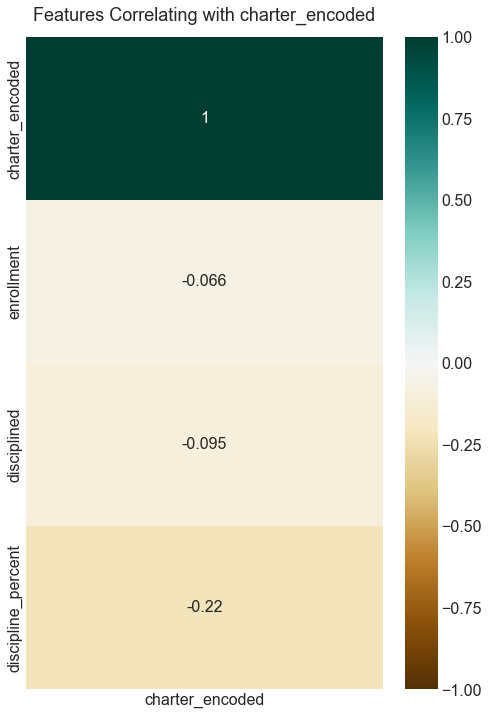

In [113]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_scaled.corr(method='pearson')[['charter_encoded']].sort_values(by='charter_encoded', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with charter_encoded', fontdict={'fontsize':18}, pad=16);

In [114]:
target_var= 'charter_encoded'

In [ ]:
# Use a scipy stats function pearson to calculate the correlation coefficient and the p-value.
def pearson_test(train_scaled, target_var, test_var):
    r, p_value = pearsonr(train_scaled[target_var], train_scaled[test_var])
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

In [ ]:
pearson_test(train_scaled, target_var, 'discipline_percent')

In [ ]:
pearson_test(train_scaled, target_var, 'enrollment')

In [ ]:
pearson_test(train_scaled, target_var, 'disciplined')

Acquire, prepare & split your data.

Target: charter_encoded

Null H:There is no difference in discipline_percent  between traditional school districts and charter school district.

Alt H: There is a difference in discipline_percent between traditional school districts and charter school district.

Univariate Stats For each quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()). For categorical variable): create a frequency table and a bar plot of those frequencies. Document takeaways & any actions.



In [ ]:
# Creating a list of our numeric columns
numcols = [col for col in train_scaled.columns if train_scaled[col].dtype != 'O']

# Histograms of numeric columns
for col in numcols:
    print(col)
    train_scaled[col].hist()
    plt.show()

In [ ]:
box_plot_data=[train_scaled.enrollment, train_scaled.disciplined, train_scaled.discipline_percent]
plt.boxplot(box_plot_data)
plt.show()

In [ ]:
train_scaled.describe()

In [116]:

# one way frequency table for the species column.
freq_table = pd.crosstab(train_scaled['dist_name'], 'count')
  
freq_table

col_0,count
dist_name,
A W BROWN LEADERSHIP ACADEMY,3
A+ ACADEMY,3
A+ UNLIMITED POTENTIAL,3
ABBOTT ISD,2
ABERNATHY ISD,3
...,...
YORKTOWN ISD,3
YSLETA ISD,4
ZAPATA COUNTY ISD,4


In [117]:
train_scaled.dist_name.value_counts()


DAWSON ISD           7
VALLEY VIEW ISD      7
HIGHLAND PARK ISD    7
WYLIE ISD            6
AQUILLA ISD          5
                    ..
SALTILLO ISD         1
AZLE ISD             1
LINDSAY ISD          1
SNYDER ISD           1
FORT BEND ISD        1
Name: dist_name, Length: 1071, dtype: int64

In [ ]:
#Visualize distribution of target variable
plt.hist(train_scaled['charter_encoded'])


Bivariate Stats

Visualize each measurement type (y-axis) with the target variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



Document takeaways & any actions.

In [ ]:
Interactions of 2 Variables
For bivariate exploration, we should analyze each feature with respect to the target variable and document takewaways.

A scatterplot will help us visualize numeric to numeric columns.

A catplot, barplot, or boxplot will help us visualize categorical variables with numeric variables. A nice thing about a .barplot is that by setting the binary target to the y axis, we see proportions.

Always write down what questions you have before you explore.

Always document your findings and takeaways, even if the takeaway is "There's nothing here between x and y"

Some findings from bi-variate exploration may need more detailed investigation with an additional variable...

In [ ]:
sns.boxplot(data=train_scaled, x='discipline_percent', y='charter_encoded')
plt.show

In [ ]:
sns.boxplot(data=train_scaled, x='disciplined', y='charter_encoded')
plt.show

In [ ]:
sns.scatterplot(x="disciplined",y="discipline_percent",hue="charter_status",data=train_scaled)


In [ ]:
sns.scatterplot(x="enrollment",y="discipline_percent",hue="charter_status",data=train_scaled)


Step 1: Import the libraries
Step 2: Fetch data
Step 3: Determine the target variable
Step 4: Creation of predictors variables
Step 5: Test and train dataset split
Step 6: Create the machine learning classification model using the train dataset
Step 7: The classification model accuracy_score in Python
Step 8: Prediction
Step 9: Plotting classification data in matplotlib

Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent charter.

Visualize two numeric variables of the charter. Hint: sns.relplot with hue or col

Ask a specific question of the data, such as: is the charter_status signficantly different in traditional schools vs charter schools? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.document takeaways (nulls, datatypes to change, outliers, ideas for features, etc.)

In [ ]:
sns.pairplot(train_scaled, hue='charter_encoded', corner=True)
plt.show()


Visualize two numeric variables of the charter. Hint: sns.relplot with hue or col


# assign the train variables
X_train_scaled = train_scaled[['enrollment','disciplined', 'discipline_percent']]
y_train=train[['charter_encoded']]
#assign the validate variables
X_validate_scaled=validate_scaled[['enrollment','disciplined', 'discipline_percent']]
y_validate=validate[['charter_encoded']]
# assign the test variables
X_test_scaled=test_scaled[['enrollment','disciplined', 'discipline_percent']]
y_test=test[['charter_encoded']]
# BASELINE
#Use RMSE on both the mean and median.

# Create a function to get baseline.
def baseline(X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test):
    # We need y_train and y_validate (and test) to be dataframes to append the new columns with predicted values. 
    y_train = pd.DataFrame(y_train)
    y_validate = pd.DataFrame(y_validate)
    y_test = pd.DataFrame(y_test)

    # 1. Predict home_value_pred_mean
    logerror_pred_mean = y_train['charter_encoded'].mean()
    y_train['logerror_pred_mean'] = logerror_pred_mean
    y_validate['logerror_pred_mean'] = logerror_pred_mean

    # 2. compute home_value_pred_median
    logerror_pred_median = y_train['logerror'].median()
    y_train['logerror_pred_median'] = logerror_pred_median
    y_validate['logerror_pred_median'] = logerror_pred_median

    # 3. RMSE of home_value_pred_mean
    rmse_train = mean_squared_error(y_train[['logerror']], y_train.logerror_pred_mean)**(1/2)
    rmse_validate = mean_squared_error(y_validate[['logerror']], y_validate.logerror_pred_mean)**(1/2)

    print("RMSE using Mean\nTrain/In-Sample: ", (rmse_train), 
      "\nValidate/Out-of-Sample: ", (rmse_validate))

    # 4. RMSE of home_value_pred_median
    rmse_train = mean_squared_error(y_train[['logerror']], y_train.logerror_pred_median)**(1/2)
    rmse_validate = mean_squared_error(y_validate[['logerror']], y_validate.logerror_pred_median)**(1/2)

    print("RMSE using Median\nTrain/In-Sample: ", (rmse_train), 
      "\nValidate/Out-of-Sample: ", (rmse_validate))
  
baseline(X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test)

# to get a baseline, I use this dummyclassifier from sklearn

class sklearn.dummy.DummyClassifier(*, strategy='stratified', random_state=123, constant=None)


>>> import numpy as np
>>> from sklearn.dummy import DummyClassifier
>>> X = np.array([-1, 1, 1, 1])
>>> y = np.array([0, 1, 1, 1])
>>> dummy_clf = DummyClassifier(strategy="stratified")
>>> dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
>>> dummy_clf.predict(X)
array([1, 1, 1, 1])
>>> dummy_clf.score(X, y)
0.75

train: in-sample, explore, impute mean, scale numeric data (max() - min()...), fit our ml algorithms, test our models.
validate, test: represents future, unseen data
validate: confirm our top models have not overfit, test our top n models on unseen data. Using validate performance results, we pick the top 1 model.
test: out-of-sample, how we expect our top model to perform in production, on unseen data in the future. ONLY USED ON 1 MODEL.

Are you comparing, looking at the relationship or summary stats or visualizations with 2+ variables?
Are you using an sklearn method?
Are you moving into the explore stage of the pipeline?
If ONE or more of these is yes, then you should be doing it on your train sample. If ALL are no, then the entire dataset is fine.

Plot the interactions of each variable with the target. Document your takeaways.

For numeric to numeric, use a scatterplot or lineplot

For numeric to categorical variables, see https://seaborn.pydata.org/tutorial/categorical.html

Multivariate Stats (more than 2 variables): Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing.

If you're using seaborn's relplot or catplot, use the hue or col arguments to add extra dimension(s) to the visuals.
Using sns.pairplot with hue may be helpful. With too many columns, however, it can produce visuals that are too noisy to be useful.
See https://seaborn.pydata.org/tutorial/axis_grids.html for more multivariate options

Statistical Tests: If the visualizations are not crystal clear, it's important to conduct hypothesis tests.

With numeric to numeric, test for correlation with Pearson's R for linear and Spearman's R for non-linear relationships.

For numeric to categorical, compare the means of two populations or a subgroup to the population using a t-test, if your samples are normaly(ish) distributed but have different variances (as determined by calling .var() on each column/Series, ANOVA to compare means from more than 2 groups, or a Mann-Whitney u-test if the data does not match the assumptions of a t-test.

With categorical to categorical variables, use 
χ
2
, chi-squared test.

In [ ]:
Standing Orders for Exploration

Document your initial questions or assumptions. Write them down (in your README or notebook) so they are concrete and not in your head.

Document your takeaways after each visualization. Even if your takeaway is, "there is nothing interesting between var1 and target".

Document your answer to each question.

When you run statistical tests to answer your questions, Document your null and alternative hypothesis, the test you run, the test results, and your conclusion.

Document your takeaways, in case that wasn't clear. It is a huge component of your final deliverable/analysis.

Document your action plan. What are your next steps and/or new questions based on what you have learned? I recommend documenting, continuing through all of your questions, and then going back and taking action only after you have answered your initial questions.




In [ ]:
 Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "survival and class of ticket are independent"
alternative_hypothesis = "there is a relationship between class of ticket and survival"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.survived, train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

In [ ]:
4. What's the relationship between fare and survival?

Comparing Numeric vs. a Categorical Example

If the visual is not completely clear, the need for a hypothesis test increases.

First, set your confidence level and your alpha (Confidence level of 95% and alpha of 0.05 are good)
Select the appropriate test for your 2 variables:
If numeric to numeric, run a correlation test
Compare proportions with 
χ
2
Compare means with t-test or Mann-Whitney u-test.
Run tests, form conclusions, and document your results
(rinse and then repeat with other variables of interest)

In [118]:
# Subset the data into survived and not-surviving status
not_charter = train_scaled[train_scaled.charter_encoded == 0]
charter = train_scaled[train_scaled.charter_encoded == 1]

In [119]:
# check variances of the two groups
not_charter.discipline_percent.var(), charter.discipline_percent.var()



(0.010725752176375869, 0.008745753545506914)